<a href="https://colab.research.google.com/github/VasireddyNandini/predictive-analysis/blob/forecast_demand_warehouse/forecast%20demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxes1cum/5i3gejkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxes1cum/3a8a6tt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28617', 'data', 'file=/tmp/tmpmxes1cum/5i3gejkn.json', 'init=/tmp/tmpmxes1cum/3a8a6tt4.json', 'output', 'file=/tmp/tmpmxes1cum/prophet_model9lwwx748/prophet_model-20250730040446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


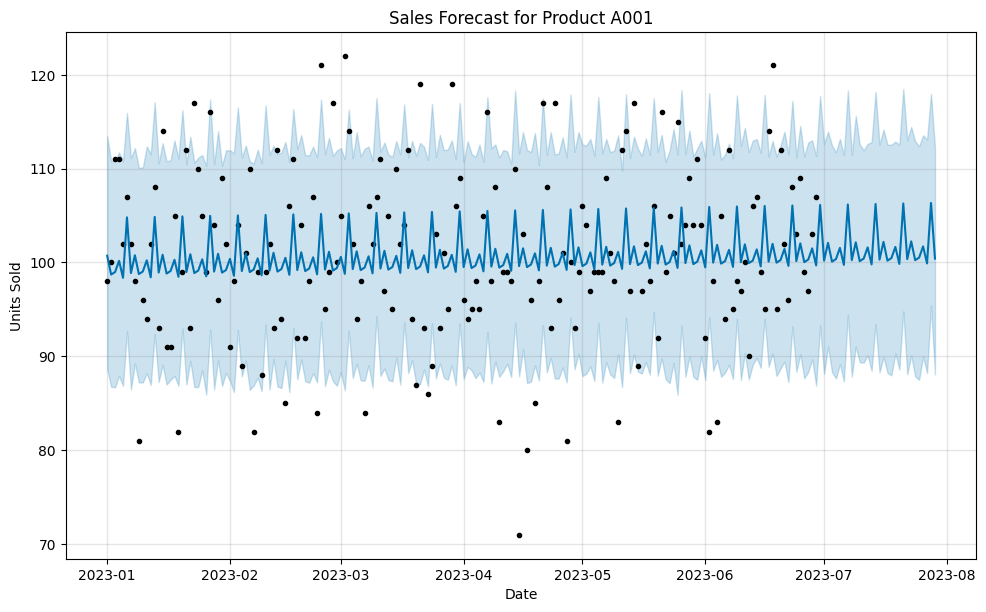

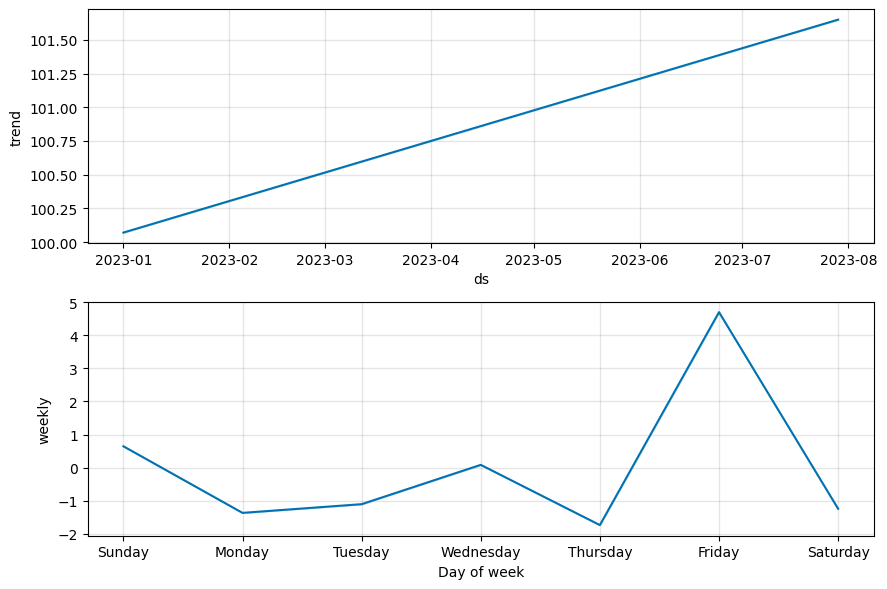


Forecast Data:
            ds        yhat  yhat_lower  yhat_upper
205 2023-07-25  100.519460   87.502297  112.375127
206 2023-07-26  101.713934   89.992959  113.553260
207 2023-07-27   99.903662   88.210587  113.106073
208 2023-07-28  106.339330   95.412603  117.967192
209 2023-07-29  100.411018   88.071824  112.212513


In [15]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# -----------------------------
# STEP 1: Load and prepare data
# -----------------------------
df = pd.read_csv('warehouse_sales.csv')  # your CSV file
df['date'] = pd.to_datetime(df['date'])

# Choose a product to forecast
product_id = 'A001'
product_df = df[df['product_id'] == product_id]

# Aggregate daily sales
product_daily = product_df.groupby('date')['units_sold'].sum().reset_index()
product_daily.columns = ['ds', 'y']  # Prophet expects 'ds' and 'y'

# -----------------------------
# STEP 2: Train Prophet model
# -----------------------------
model = Prophet()
model.fit(product_daily)

# -----------------------------
# STEP 3: Make future predictions
# -----------------------------
future = model.make_future_dataframe(periods=30)  # forecast next 30 days
forecast = model.predict(future)

# -----------------------------
# STEP 4: Visualize the forecast
# -----------------------------
fig1 = model.plot(forecast)
plt.title(f'Sales Forecast for Product {product_id}')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

# Optional: Plot components
fig2 = model.plot_components(forecast)
plt.show()

# Optional: Display forecast dataframe
print("\nForecast Data:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())